<img
src="http://www.telecom-em.eu/sites/default/files/logoimt2016.JPG"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Decision trees </font></p>
<p><font size="3"></br>Fall 2023</font></br></div>
<p><span style="color:blue">pierre.tandeo@imt-atlantique.fr</span>
</p>
</CENTER>

----------------------------
Student: Santigo Quinteros
----------------------------

The goal of this lab is to implement and visualize decision trees. Both aspects of classification and regression will be studied using simple examples. Cross-validation procedures will be used to tune the important parameters of the trees. Monte Carlo methods, using an ensemble of decision trees, are also discussed.

In [23]:
# Install graphviz library (needed to plot a tree)
!pip install graphviz 
#or: 
#!pip install python-graphviz 
#!sudo apt-get install graphviz

DEPRECATION: vtk -PKG-VERSION has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of vtk or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
# Import classic libraries (Matplotlib and PyLab)
%matplotlib inline
%pylab inline

# Import scikit-learn functions
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import log_loss

# Import pandas
import pandas as pd

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Figure size
pylab.rcParams['figure.figsize'] = (16, 9)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## I - Course example on regression trees

The decision tree is presented in the course using a simple regression problem. This is corresponding to a simple regression between $y$ and $x$, using a $\sin$ function.

> 1. Generate x and y (adding an additive random noise of mean=0 and std=0.25 on y)
> 2. Apply a single regression tree with depth=1,...,10
> 3. Optimize the depth of the tree using cross-validation
> 4. Compute and plot the tree with the optimal depth
> 5. Implement a regression forest with the optimal depth

Text(0, 0.5, 'y')

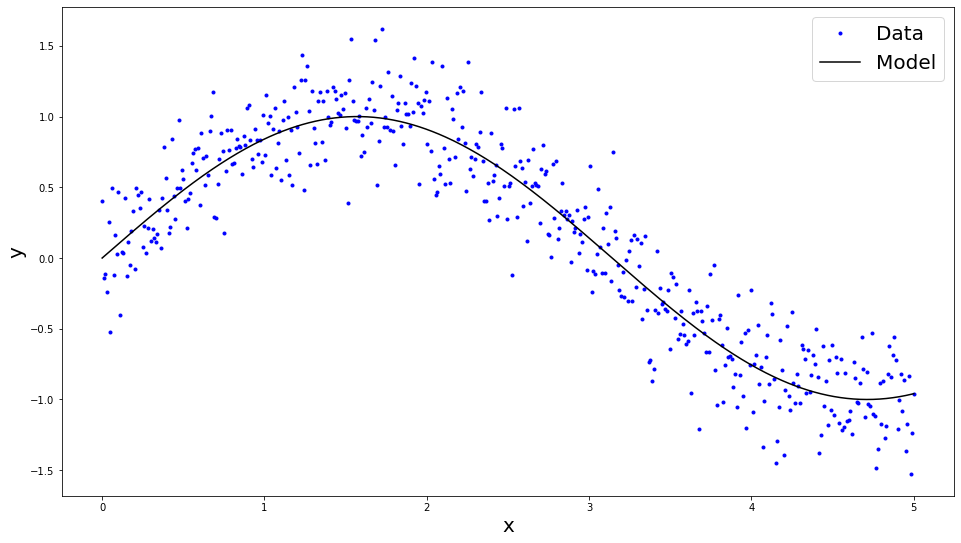

In [17]:
# 1. Generate x and y (adding an additive random noise of mean=0 and std=0.25 on y)
import numpy as np

# Data generation
random.seed(1) # setting seed for reproducability
n = 500 # number of samples
x = array([linspace(0, 5, n)]).T
y = sin(x) + np.random.normal(0, 0.25, x.shape)

# Plot
line1, = plot(x, y, '.b')
line2, = plot(x, sin(x), '-k')
legend([line1, line2], ['Data', 'Model'], prop={'size': 20})
xlabel('x', size=20)
ylabel('y', size=20)

Text(0, 0.5, 'y')

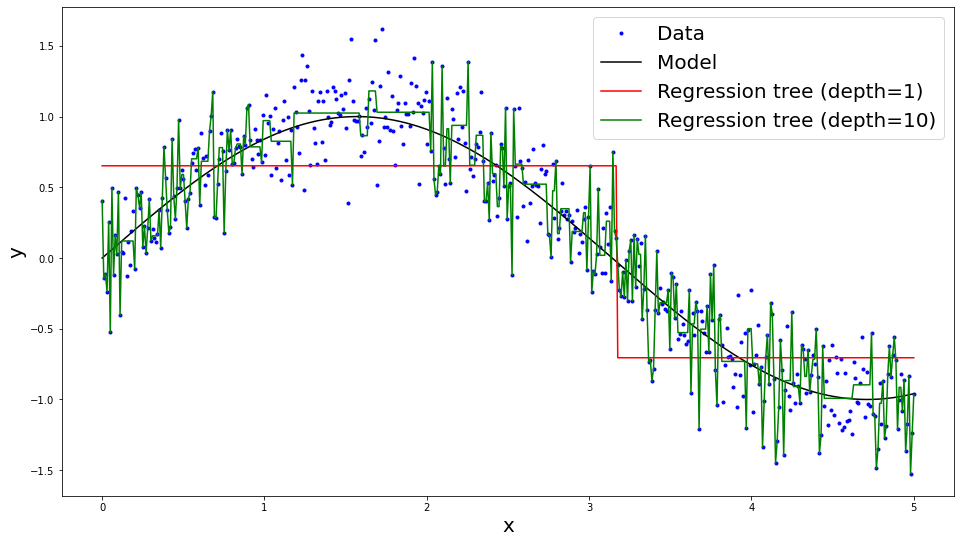

In [18]:
# 2. Apply a single regression tree with depth=1,...,10

# Build the tree (with depth=1)
reg_tree_example_1 =DecisionTreeRegressor(max_depth=1)
reg_tree_example_1.fit(x, y)
y_tree_example_1 = reg_tree_example_1.predict(x)

# Build the trees (with depth=10)
reg_tree_example_10 = DecisionTreeRegressor(max_depth=10)
reg_tree_example_10.fit(x, y)
y_tree_example_10 = reg_tree_example_10.predict(x)

# Plot
line1, = plot(x, y, '.b')
line2, = plot(x, sin(x), '-k')
line3, = plot(x, y_tree_example_1, '-r')
line4, = plot(x, y_tree_example_10, '-g')
legend([line1, line2, line3, line4], ['Data', 'Model', 'Regression tree (depth=1)', 'Regression tree (depth=10)'], prop={'size': 20})
xlabel('x', size=20)
ylabel('y', size=20)

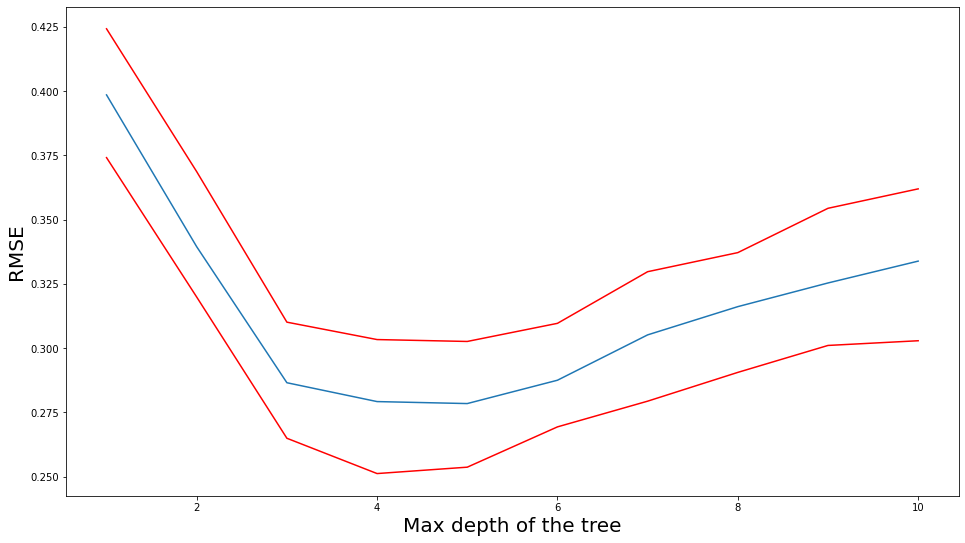

In [39]:
# 3. Optimize the depth of the tree using cross-validation

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit( n_splits=100,test_size=1/3,train_size=2/3)

# Define the max depths between 1 and 10
n_depths = 10
depths = linspace(1, 10, n_depths)

# Loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = zeros(n_depths)
tab_RMSE_tree_upper= zeros(n_depths)
tab_RMSE_tree_lower= zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeRegressor(max_depth=depths[i])
    #tab_RMSE_tree[i] = median(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))
    tab_RMSE_tree[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.5)
    tab_RMSE_tree_upper[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.05)
    tab_RMSE_tree_lower[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.95)

# Plot
plot(depths, tab_RMSE_tree)
xlabel('Max depth of the tree', size=20)
ylabel('RMSE', size=20)

plot(depths, tab_RMSE_tree_upper,'r')
plot(depths, tab_RMSE_tree_lower,'r')

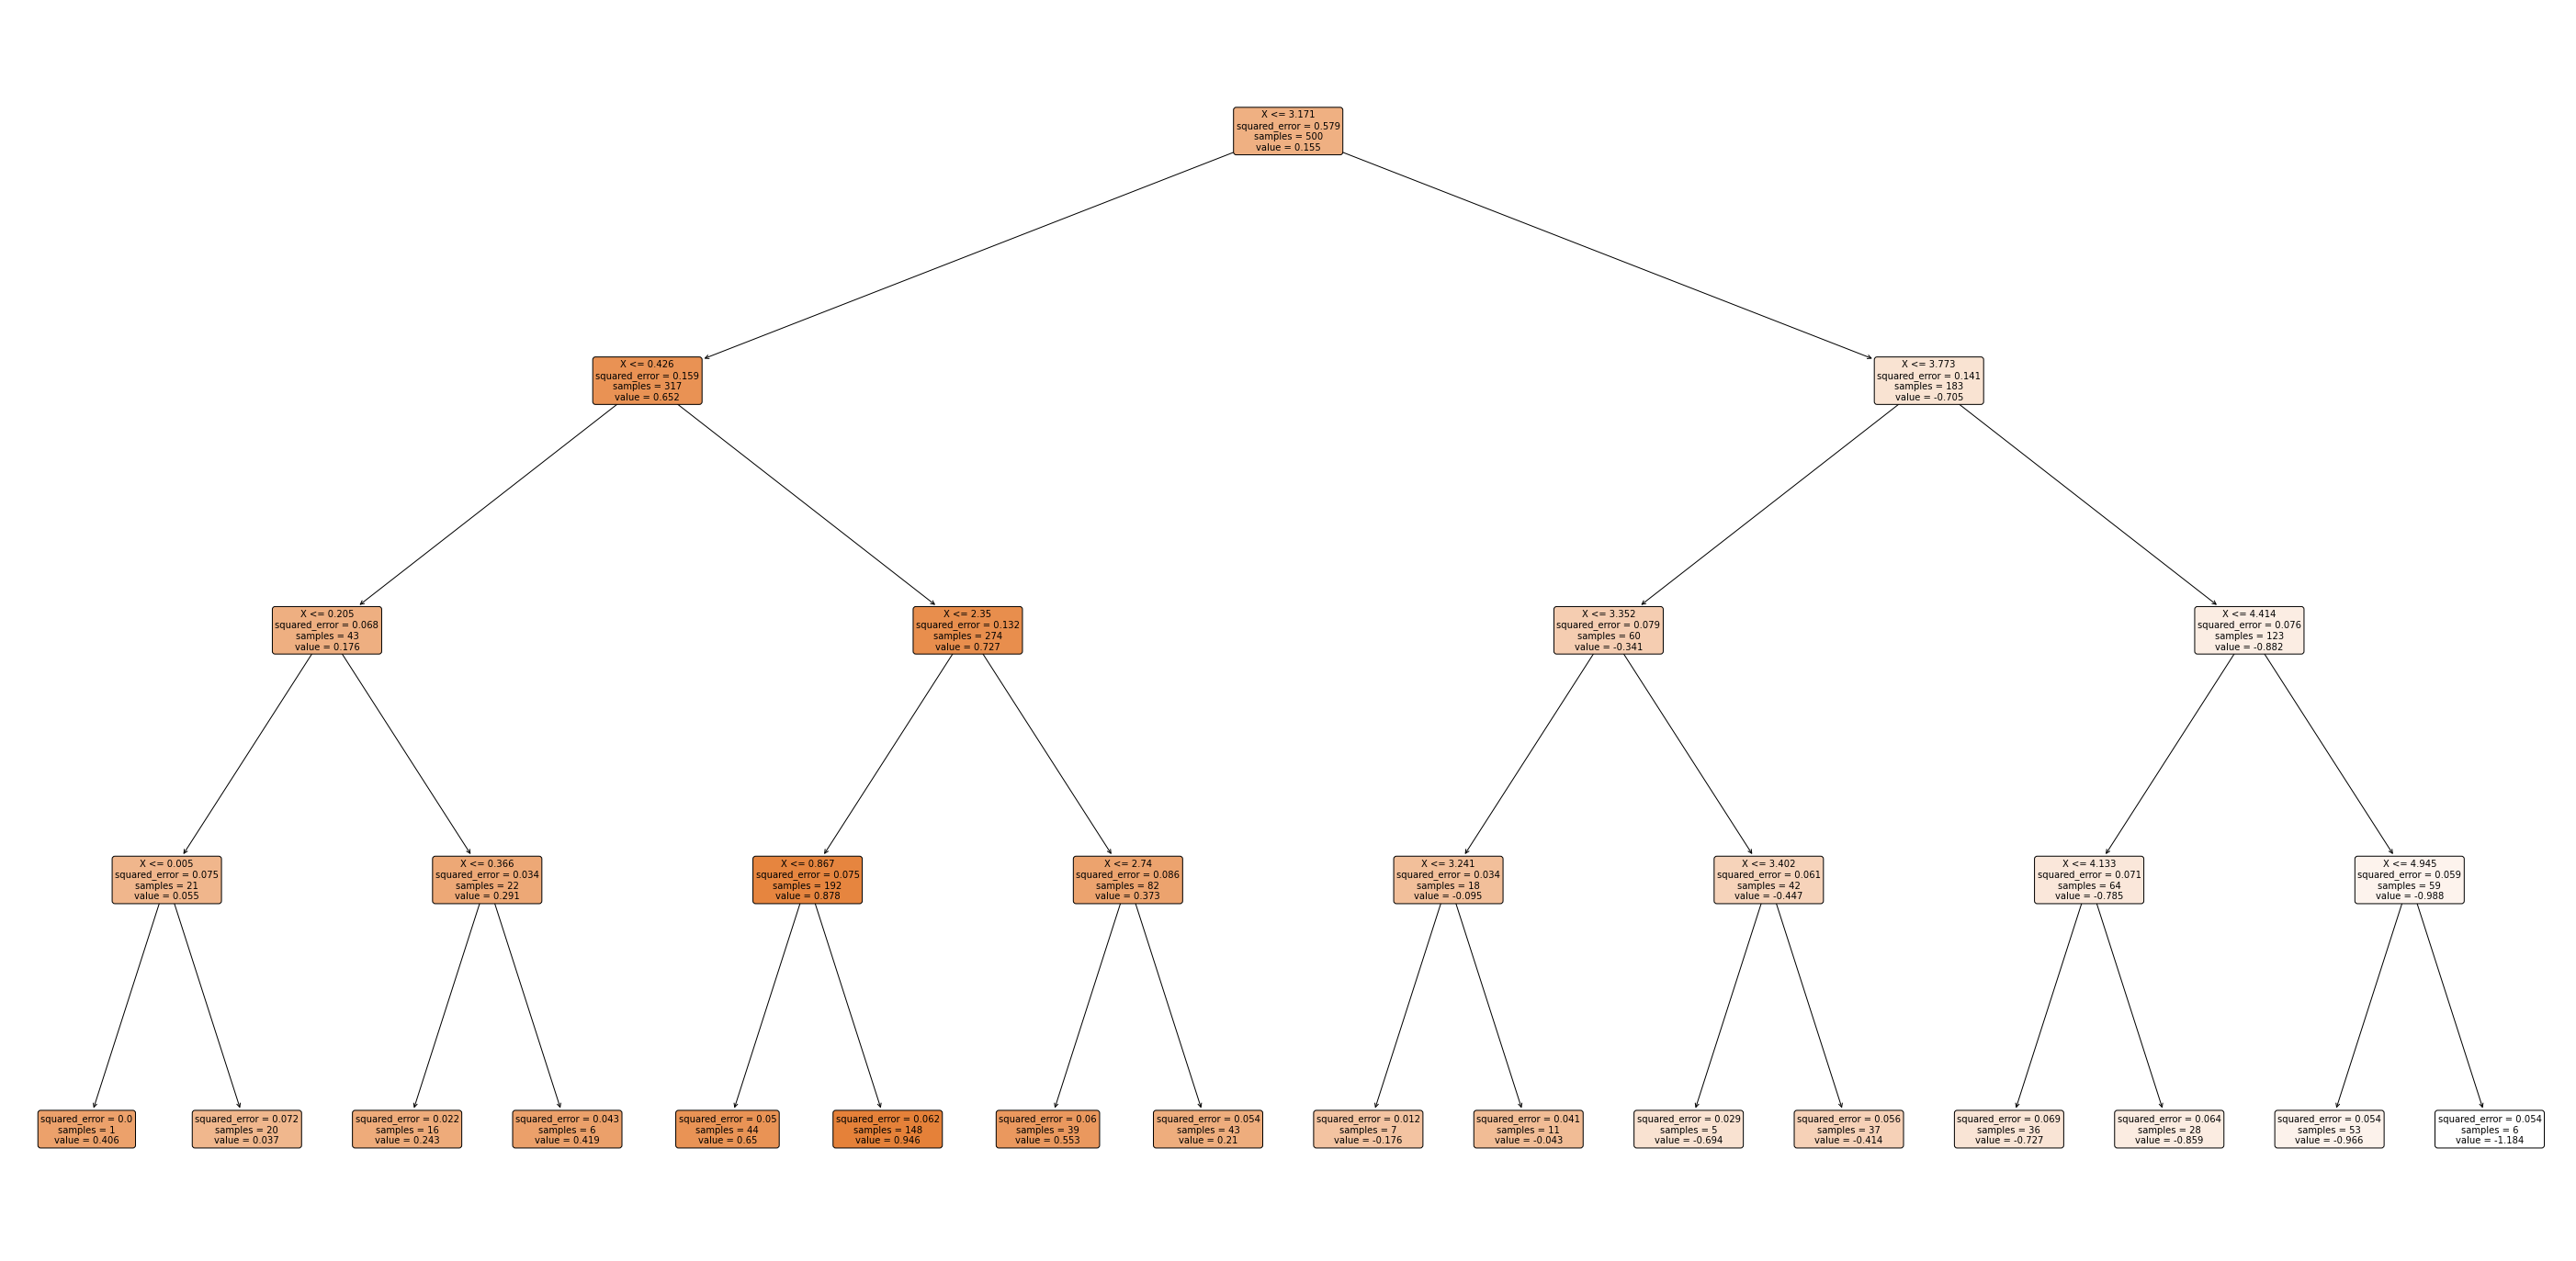

In [27]:
# 4. Compute and plot the tree with the optimal depth

# Adjust regression tree with optimal depth
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already created and fitted your DecisionTreeRegressor named reg_tree

# Increase the size of the plot
plt.figure(figsize=(50, 25))

# Plot the decision tree
plot_tree(reg_tree, filled=True, feature_names=['X'], rounded=True, fontsize=10)

# Show or save the plot
plt.show()

Text(0, 0.5, 'y')

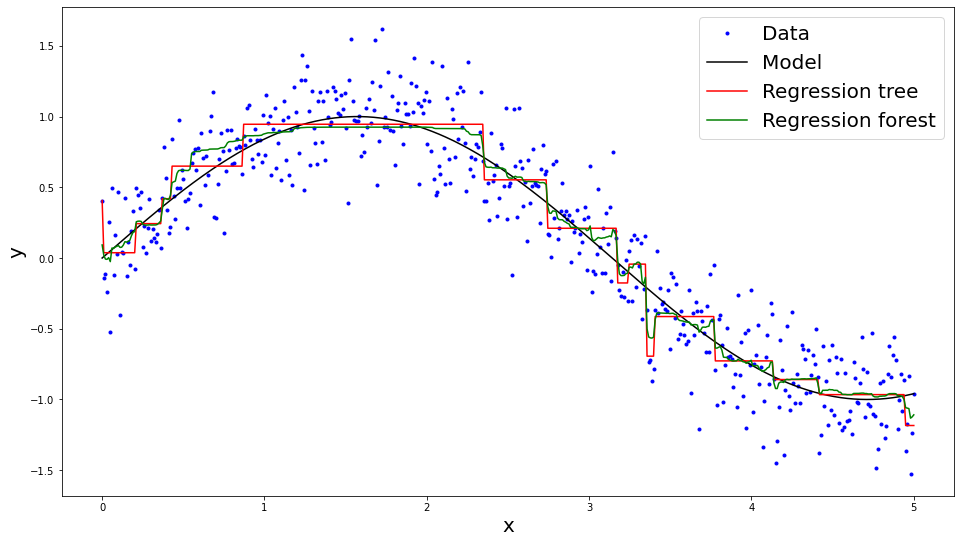

In [33]:
# 5. Implement a regression forest with the optimal depth

# Adjust regression forest using 1000 trees
reg_forest = RandomForestRegressor(n_estimators=1000,max_depth=4)
reg_forest.fit(x, y)
y_forest = reg_forest.predict(x)

# Plot
line1, = plot(x, y, '.b')
line2, = plot(x, sin(x), '-k')
line3, = plot(x, y_tree, '-r')
line4, = plot(x, y_forest, '-g')
legend([line1, line2, line3, line4], ['Data', 'Model', 'Regression tree', 'Regression forest'], prop={'size': 20})
xlabel('x', size=20)
ylabel('y', size=20)

## II - Single tree for binary classification

Here, we use a binary classification on the Titanic historical dataset. The goal is to understand the rules infered by the classification tree to predict the output variable (i.e., did people died or survived).

> 1. Import X and y
> 2. Use a cross-validation procedure to tune the depth of the classification tree
> 3. Plot the best classification tree
> 4. Explain the rules obtained to get the classification

In [62]:
# 1. Import X and y

# Import dataset
data_titanic = pd.read_csv('titanic.csv')

# Read X and y
x = data_titanic.drop(['Survived'], axis=1).values
y = data_titanic['Survived'].values
y = (y>0.5) # transform to binary data
y=[int(i) for i in y ]

Here are some details about the dataset:
- Survived (False --> no, True --> yes)
- Pclass (1 --> 1st class, 2 --> 2nd class, 3 --> 3rd class)
- Sex (0 --> female, 1 --> male)
- Age (0 --> less than 16, 1 --> between 16 and 32, 2 --> between 32 and 48, 3 --> between 48 and 64, 4 --> more than 64)
- FamilySize (number of members in the family)
- Title (1 --> Mr, 2 --> Master, 3 --> Mrs, 4 --> Miss, 5 --> rare)

[0.46781964 0.45689628 0.42243482 0.42243482 0.42836646 0.43808583
 0.44191198 0.44191198 0.44758593 0.45319665]


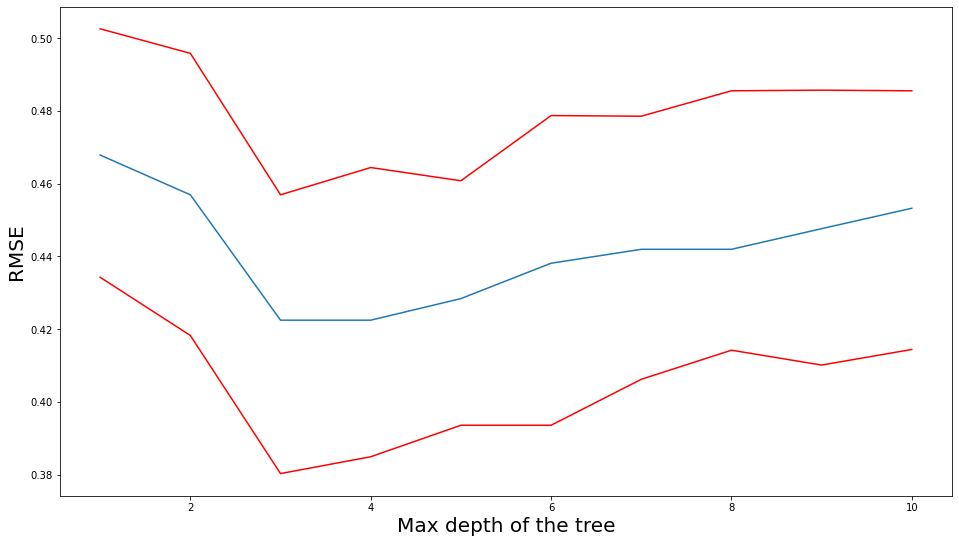

In [63]:
# 2. Use a cross-validation procedure to tune the depth of the classification tree

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit( n_splits=100,test_size=1/3,train_size=2/3)

# Define the max depths between 1 and 10
n_depths = 10
depths = linspace(1, 10, n_depths)

# Loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = zeros(n_depths)
tab_RMSE_tree_upper= zeros(n_depths)
tab_RMSE_tree_lower= zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeClassifier(max_depth=depths[i])
    #tab_RMSE_tree[i] = median(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))
    tab_RMSE_tree[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.5)
    tab_RMSE_tree_upper[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.05)
    tab_RMSE_tree_lower[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.95)

# Plot
plot(depths, tab_RMSE_tree)
xlabel('Max depth of the tree', size=20)
ylabel('RMSE', size=20)

plot(depths, tab_RMSE_tree_upper,'r')
plot(depths, tab_RMSE_tree_lower,'r')

print(tab_RMSE_tree)

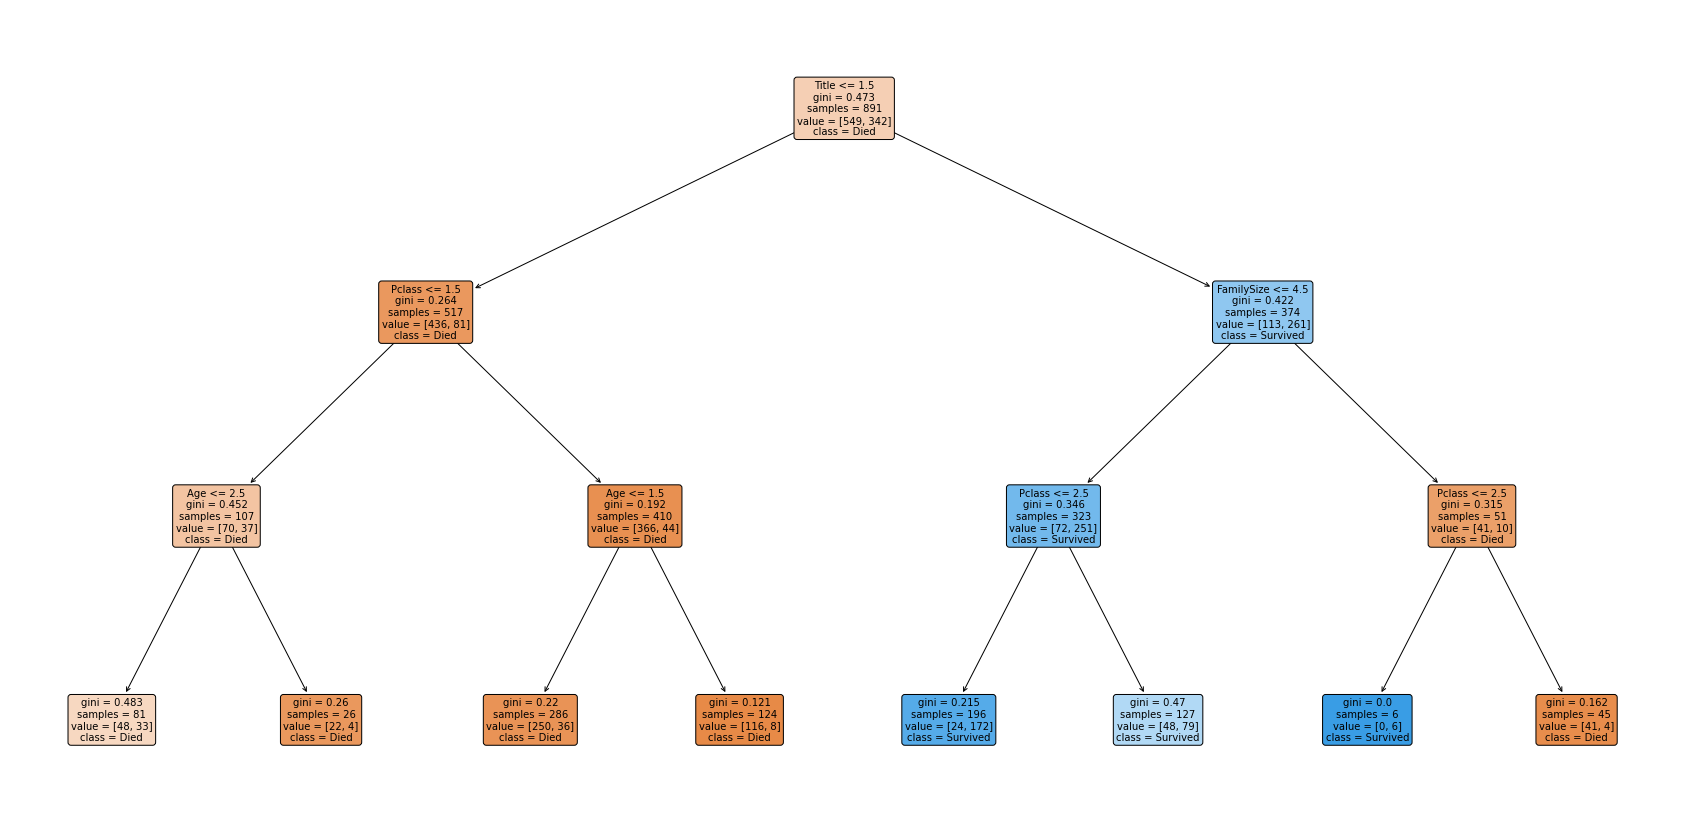

In [68]:
# 3. Plot the best classification tree

# Adjust regression tree with optimal depth
reg_tree = DecisionTreeClassifier(max_depth=3)
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already created and fitted your DecisionTreeRegressor named reg_tree

# Increase the size of the plot
plt.figure(figsize=(30, 15))

# Plot the decision tree
plot_tree(reg_tree, filled=True, feature_names=['Pclass','Sex','Age','FamilySize','Title'], class_names= ['Died','Survived'], rounded=True, fontsize=10)

# Show or save the plot
plt.show()

### 4. Explain the rules obtained to get the classification

Every node shows the condition evaluated on top. The left branch is the 'True' and right is 'False' (Condition verified or not)

1st node) The most significant condition is gender. Men mostly died. Women mostly survived.


#### Men side: 

-The group with most survival rate were young men in first class.

-The group with the least survival rate were older men (more than 32 y/0) in second or third class.


#### Women side: 

-The group with most survival rate were women with small families and in first class or second.

-The group with the least survival rate women with big families third class.

## III - Multiple trees for binary classification

We consider another binary classification problem. The goal is to visualize the results of decision trees in nonlinear problems.

> 1. Generate data (x1, x2, y)
> 2. Apply classification trees with depth=1,2,3,4
> 3. Implement and compare the classification forest with depth=3 and the ada boost classifier

Text(0.5, 1.0, 'Binary classification')

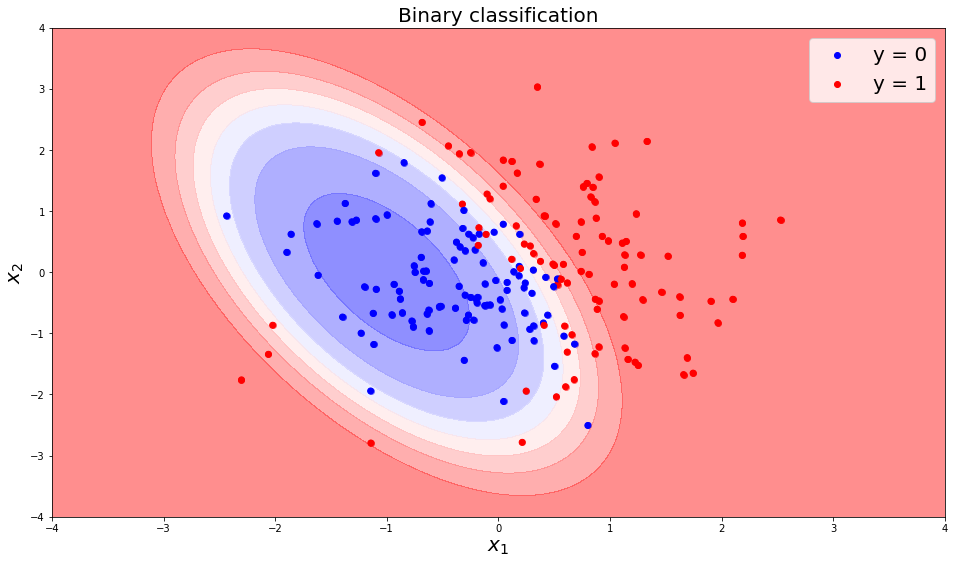

In [109]:
# 1. Generate the data

# Input variables
random.seed(1) # setting seed for reproducability
n = 200 # number of samples
x1 = randn(n, 1)
x2 = randn(n, 1)
x = hstack((x1, x2))

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = randn(n, 1)/3

# Output variable
y_noise = tanh(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0).astype(int) # transform to binary data


# For visualization
X1, X2 = meshgrid(linspace(-4, 4, 100), linspace(-4, 4, 100))
X = vstack((ravel(X1), ravel(X2))).T
Y = tanh(w0 + w1*X1 + w2*X2 + w11*X1**2 + w22*X2**2 + w12*X1*X2)

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
legend(['y = 0', 'y = 1'], prop={'size': 20})
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Binary classification', size=20)

[0.4571162  0.4404882  0.42320737 0.42320737]


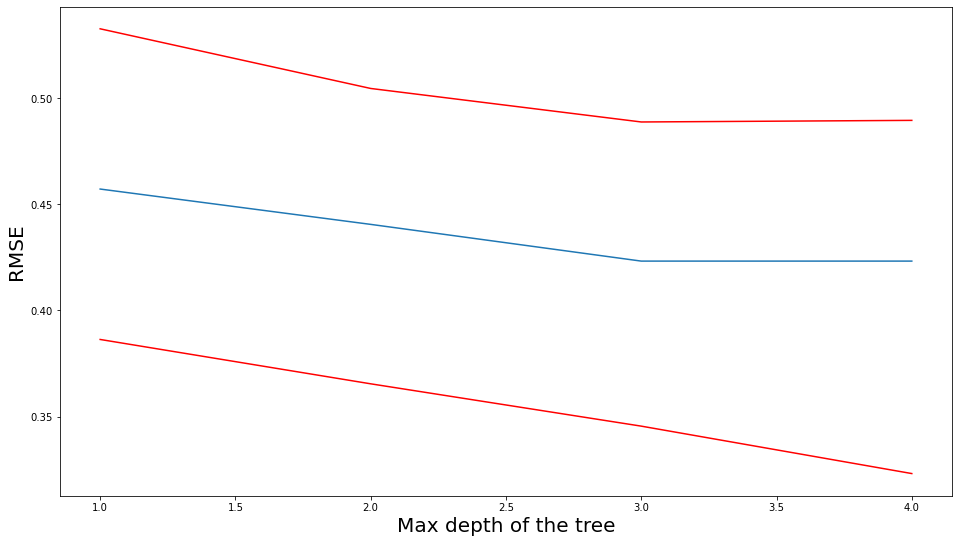

In [100]:
# 2. Apply classification trees with depth=1,2,3,4

# 2. Use a cross-validation procedure to tune the depth of the classification tree

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit( n_splits=100,test_size=1/3,train_size=2/3)

# Define the max depths between 1 and 10
n_depths = 4
depths = linspace(1, 4, n_depths)

# Loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = zeros(n_depths)
tab_RMSE_tree_upper= zeros(n_depths)
tab_RMSE_tree_lower= zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeClassifier(max_depth=depths[i])
    #tab_RMSE_tree[i] = median(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))
    tab_RMSE_tree[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.5)
    tab_RMSE_tree_upper[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.05)
    tab_RMSE_tree_lower[i] = quantile(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)),0.95)

# Plot
plot(depths, tab_RMSE_tree)
xlabel('Max depth of the tree', size=20)
ylabel('RMSE', size=20)

plot(depths, tab_RMSE_tree_upper,'r')
plot(depths, tab_RMSE_tree_lower,'r')

print(tab_RMSE_tree)

In [142]:
# 3. Implement and compare the classification forest with depth=3 and the ada boost classifier

# Adjust regression tree with optimal depth
reg_tree = DecisionTreeClassifier(max_depth=3)
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

# Adjust regression tree with optimal depth
ada = AdaBoostClassifier(n_estimators=18)
ada.fit(x, y)
y_ada = ada.predict(x)

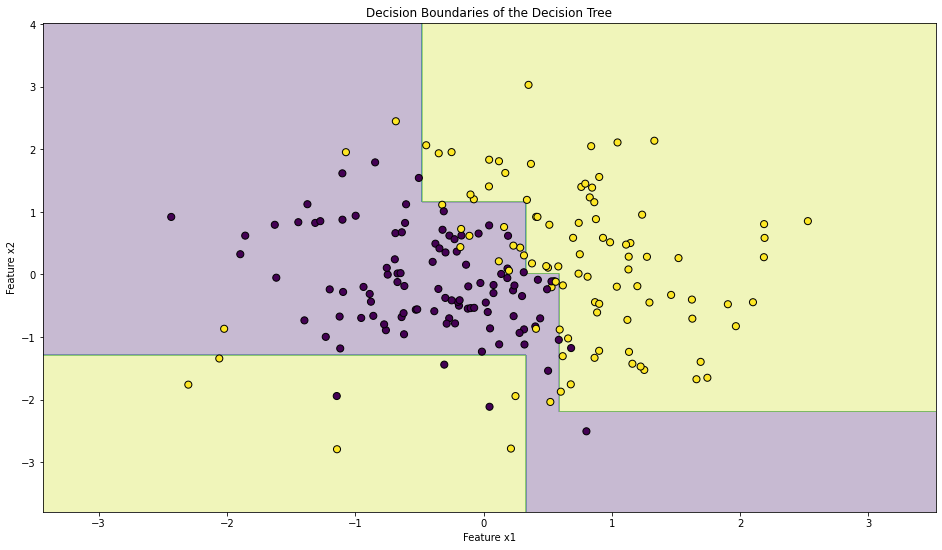

In [143]:
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Predict the labels for each point in the mesh grid
Z = reg_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot the decision boundaries
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='viridis')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50)
plt.title('Decision Boundaries of the Decision Tree')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.show()

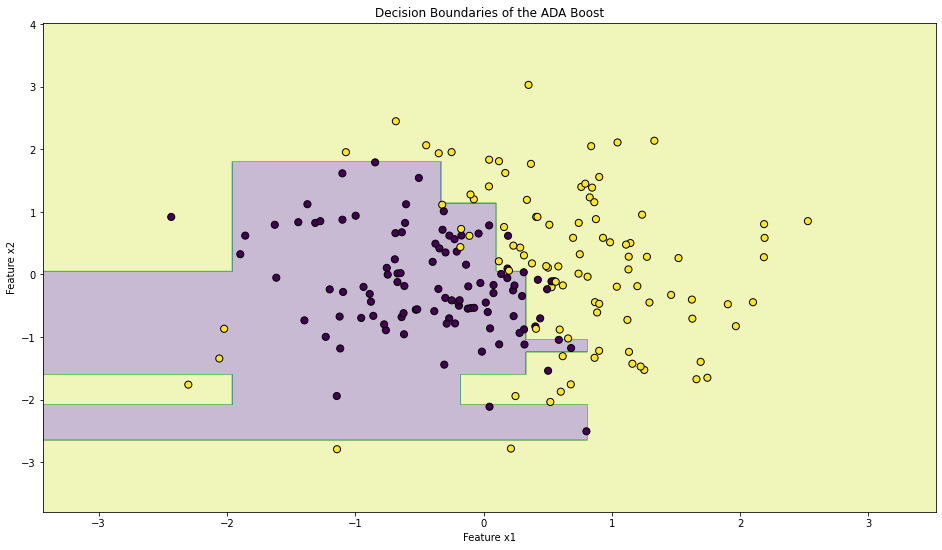

In [144]:
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Predict the labels for each point in the mesh grid
Z = ada.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot the decision boundaries
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='viridis')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50)
plt.title('Decision Boundaries of the ADA Boost')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.show()

In [145]:
#To compare qualitatively I will use the dice Coefficient
y=y.reshape(-1)

print("Decision Tree accuracy=",np.sum(y==y_tree)/len(y))
print("ADA accuracy=",np.sum(y==y_ada)/len(y))


Decision Tree accuracy= 0.89
ADA accuracy= 0.925


The ADA Boost is closer to the theorical decision boundary and has a better accuracy. The number of estimators was selected to avoid overfitting.